In [1]:
import pandas as pd
import pmdarima

In [2]:
rig_df = pd.read_excel("/home/thom/Downloads/North America Rotary Rig Count (Jan 2000 - Current)_1.xlsx",sheet_name="US Count by Trajectory",skiprows=5)

In [68]:
rig_df['year'] = rig_df['Date'].dt.year

In [71]:
import numpy as np
import pmdarima as pm
from pmdarima import pipeline
from pmdarima import model_selection
from pmdarima import preprocessing as ppc
from pmdarima import arima
from matplotlib import pyplot as plt

In [77]:
from pmdarima.arima import StepwiseContext

In [ ]:
StepwiseContext

In [79]:
data=rig_df['TOTAL']
pipe = pipeline.Pipeline([
    ("fourier", ppc.FourierFeaturizer(m=13, k=4)),
    ("arima", arima.AutoARIMA(
        stepwise=True,
        trace=1,
        error_action="ignore",
        seasonal=False,  # because we use Fourier
        suppress_warnings=True,
        information_criterion='bic'
    ))])

pipe.fit(data)
print(pipe)

Performing stepwise search to minimize bic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=12777.434, BIC=12852.142, Time=4.202 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=13248.691, BIC=13302.054, Time=0.253 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=13113.444, BIC=13172.143, Time=2.557 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=13167.266, BIC=13225.965, Time=2.758 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=13248.055, BIC=13296.082, Time=2.051 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=12777.556, BIC=12846.927, Time=3.741 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=13056.797, BIC=13120.832, Time=4.350 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=12824.538, BIC=12888.573, Time=5.331 seconds
Fit ARIMA(1,1,3)x(0,0,0,0) [intercept=True]; AIC=12778.001, BIC=12852.709, Time=3.957 seconds
Fit ARIMA(0,1,3)x(0,0,0,0) [intercept=True]; AIC=12985.483, BIC=13054.855, Time=4.345 seconds
Fit ARIMA(2,1,1)

In [88]:
n_preds=50

In [89]:
preds, conf_int = pipe.predict(n_periods=n_preds, return_conf_int=True)

/home/thom/venv38/lib/python3.8/site-packages/pmdarima/pipeline.py:449: UserWarning: Inverse transformation on confidence intervals not currently supported, will not inverse transform
  warnings.warn("Inverse transformation on confidence intervals not "


In [90]:
in_sample_preds, in_sample_confint = pipe.predict_in_sample(
    exogenous=None, 
    return_conf_int=True
)

/home/thom/venv38/lib/python3.8/site-packages/pmdarima/arima/arima.py:558: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/thom/venv38/lib/python3.8/site-packages/pmdarima/pipeline.py:449: UserWarning: Inverse transformation on confidence intervals not currently supported, will not inverse transform
  warnings.warn("Inverse transformation on confidence intervals not "


(0.0, 1600.0)

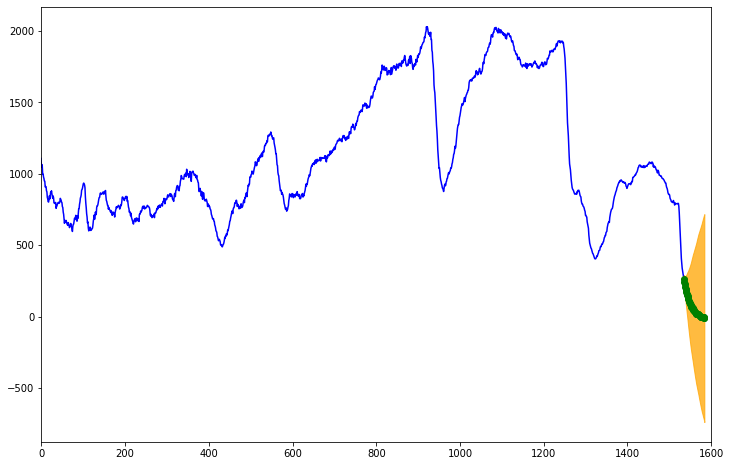

In [98]:

fig, axes = plt.subplots(1, 1, figsize=(12, 8))

# --------------------- Actual vs. Predicted --------------------------
axes.plot(
    np.arange(data.index.min()-1,data.index.max()),
    data,
    color='blue', 
    label='Rigs'
)
axes.plot(
    np.arange(data.index.max(),data.index.max()+n_preds),
    preds,
    color='green', 
    marker='o',
    label='Predicted Rig')

axes.fill_between(
    np.arange(data.index.max(),data.index.max()+n_preds),
    conf_int[:, 0], 
    conf_int[:, 1],
    alpha=0.75, color='orange',
    label="Confidence Intervals"
)

axes.set_xlim(0,1600)